In [6]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
ppp = os.path.abspath('../../visualization')

sys.path.insert(1, p)
sys.path.insert(1, pp)
sys.path.insert(1, ppp)



In [7]:
import json
import pandas as pd
from utils.salary import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mticker

 

In [34]:
output_dir = './fig/'
colors = plt.get_cmap('tab20').colors 

In [11]:
# test.json 내용: [{"name":"Jack","age":26},{"name":"Ace","age":87}]
df = pd.read_json('../../visualization/result/tag/salary.json') ## pd.read_json 이용

In [13]:
tag_info = load_json("../../visualization/result/tag/tag_info.json")

In [14]:
df = df.reset_index().rename(columns={'index':'year'})

In [15]:
df = df.sort_values(by = 'year').reset_index(drop=True)

In [16]:
# def get_CID_df_all_data(df, year) : 
#     # 모든 데이터가 다 존재하는 경우에만 CID계산 
#     year_list = [year-2, year-1, year]
#     print(year_list)
#     df = df = df[df['year'].isin(year_list)]
#     df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
#     df_salary = df_salary.dropna()

#     filtered_df = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)].copy()
#     filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary'].diff()
#     filtered_df = filtered_df.dropna().reset_index(drop=True)

#     filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['CID'].diff()
#     filtered_df = filtered_df.dropna().reset_index(drop=True)

#     return filtered_df




In [17]:
def get_CID_df(df, year) : 
    year_list = [year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()

    filtered_df = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)].copy()
    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['CID'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)


    return filtered_df




In [22]:
def get_CID_ratio_df(df, year) : 
    year_list = [year-3, year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()

    filtered_df = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)].copy()
    filtered_df['salary_ratio'] = filtered_df.groupby(['lang'])['salary'].transform(lambda x: x/x.shift(1) )
    filtered_df = filtered_df.dropna()

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary_ratio'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['CID'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)


    return filtered_df

In [23]:
def get_CID_log_df(df, year) : 
    year_list = [year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()
    df_salary['salary'] = np.log(df_salary['salary'])

    filtered_df = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)].copy()
    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['CID'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)


    return filtered_df




In [26]:
def filter_df( df, type ) :
    tot_filtered_df = pd.DataFrame()
    for year in [ 2022, 2023, 2024] : 
        if type == 'ratio' : 
            filtered_df =  get_CID_ratio_df(df, year)
        elif type == 'log' :
            filtered_df = get_CID_log_df(df, year)
        else :
            filtered_df =get_CID_df(df, year)
            
        tot_filtered_df = pd.concat([tot_filtered_df, filtered_df], axis = 0)
    
        tot_exist_df = tot_filtered_df[tot_filtered_df['lang'].isin(tot_filtered_df['lang'].value_counts()[lambda x: x == len([ 2022, 2023, 2024])].index)].copy()
        tot_exist_df=  tot_exist_df.sort_values(by = ['year', 'CID'], ascending=[False, True])
    return tot_exist_df

In [27]:
tot_df_r = filter_df(df, 'ratio')
tot_df_log = filter_df(df, 'log')
tot_df_nr = filter_df(df, 'notratio')

[2019, 2020, 2021, 2022]
[2020, 2021, 2022, 2023]
[2021, 2022, 2023, 2024]
[2020, 2021, 2022]
[2021, 2022, 2023]
[2022, 2023, 2024]
[2020, 2021, 2022]
[2021, 2022, 2023]
[2022, 2023, 2024]


In [42]:
tot_df_log[tot_df_log['lang'] =='dart']

,year,lang,salary,CID
35,2024,dart,10.704951,-0.470676
36,2023,dart,10.930640,-0.036827
24,2022,dart,10.685652,0.396649


In [35]:
def draw_bar_garph_for_df (df):
    lang    = df[df['year'] ==2024].sort_values(by = ['year', 'CID'], ascending=[False, True])['lang'].values
    years = [2022, 2023, 2024]
    CID_dict = dict()
    bar_dict = dict()

    for year in years :
        CID_dict[year] = df.loc[(df['year']== year)  & (df['lang'].isin(lang)), 'CID'].values

    x = np.arange(len(lang))

    # Figure 설정
    fig, ax = plt.subplots(figsize=(20, 8), dpi=150)

    # 막대 그리기
    width = 0.3
    width_gap = width/2


    bar1 = ax.bar(x - width- width_gap, CID_dict[2022], width=width, color=colors[0], label='2022')
    bar2 = ax.bar(x - width_gap, CID_dict[2023], width=width, color=colors[2], label='2023')
    bar3 = ax.bar(x + width_gap, CID_dict[2024], width=width, color=colors[4], label='2024')

    for rect in bar3:
        height = rect.get_height()
        if height != 0:
            ax.text(rect.get_x() + rect.get_width()/2., 1.02*np.sign(height)*abs(height), "{:,}".format(int(height)) if int(height) >0 else  "{0:0.4f}".format(float(height))
                    , ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)
        

    # x축 설정
    ax.axhline(y=0, color='black', linewidth=1)
    ax.set_xticks(x)
    ax.set_xticklabels(lang, rotation=45, ha='right')

    # # y축, 제목, 범례 설정
    ax.set_ylabel('CID for Salary')
    ax.set_title('CID Result for Median Salary in Stack Overflow Survey', fontsize=14)
    ax.legend()

    def thousands_formatter(x, pos):
        return  "{:,}".format(int(x)) 

    # ax.yaxis.set_major_formatter(mticker.FuncFormatter(thousands_formatter))

    # 그리드 추가
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f"{output_dir}Result_Fig11.png", dpi=300, bbox_inches='tight')


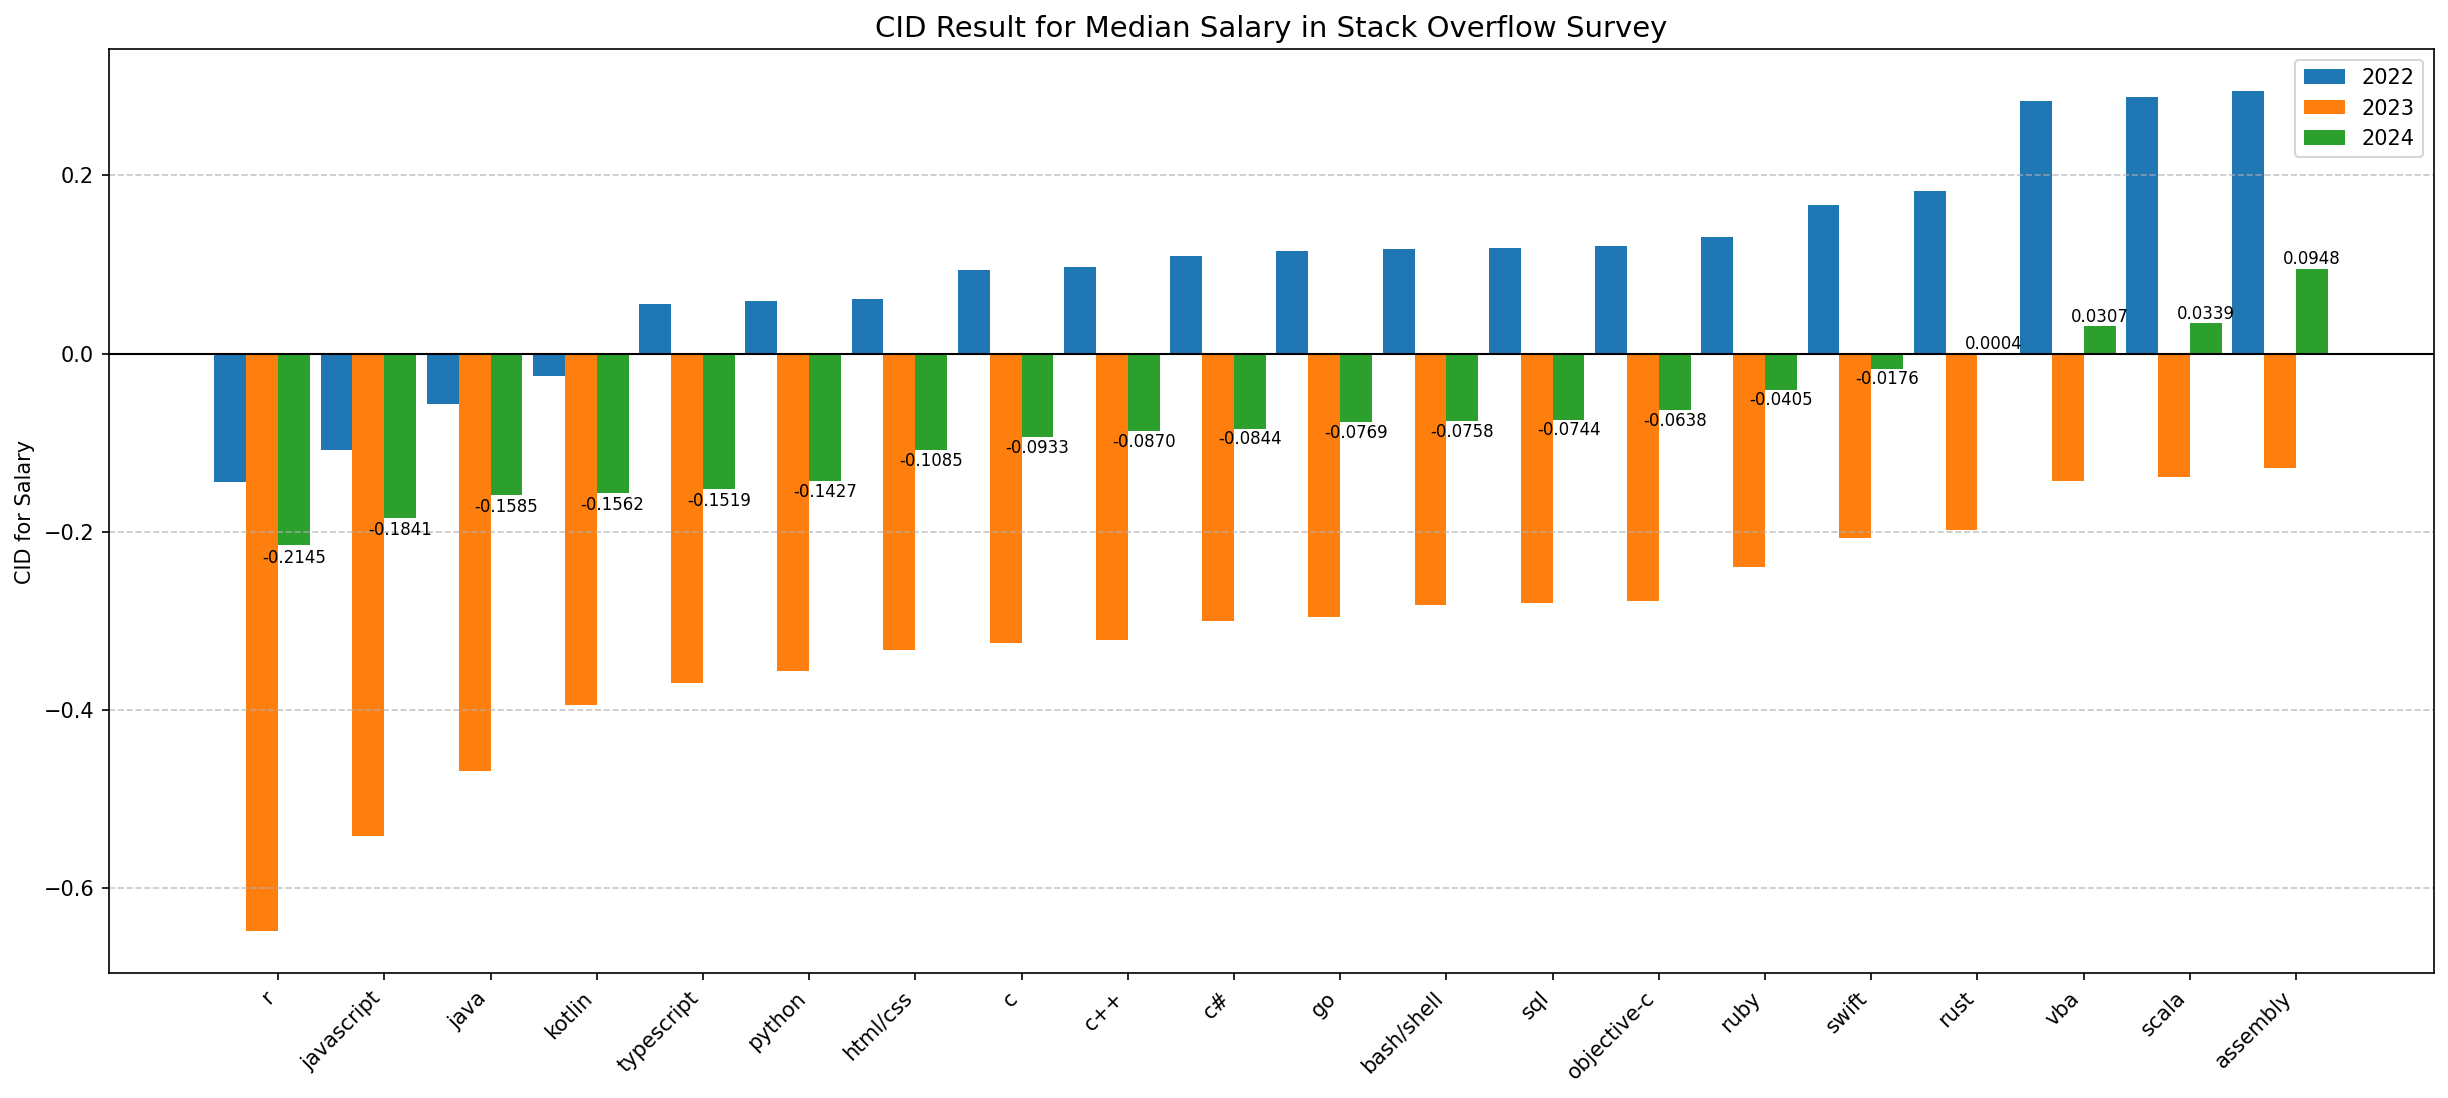

In [36]:
draw_bar_garph_for_df(tot_df_r)

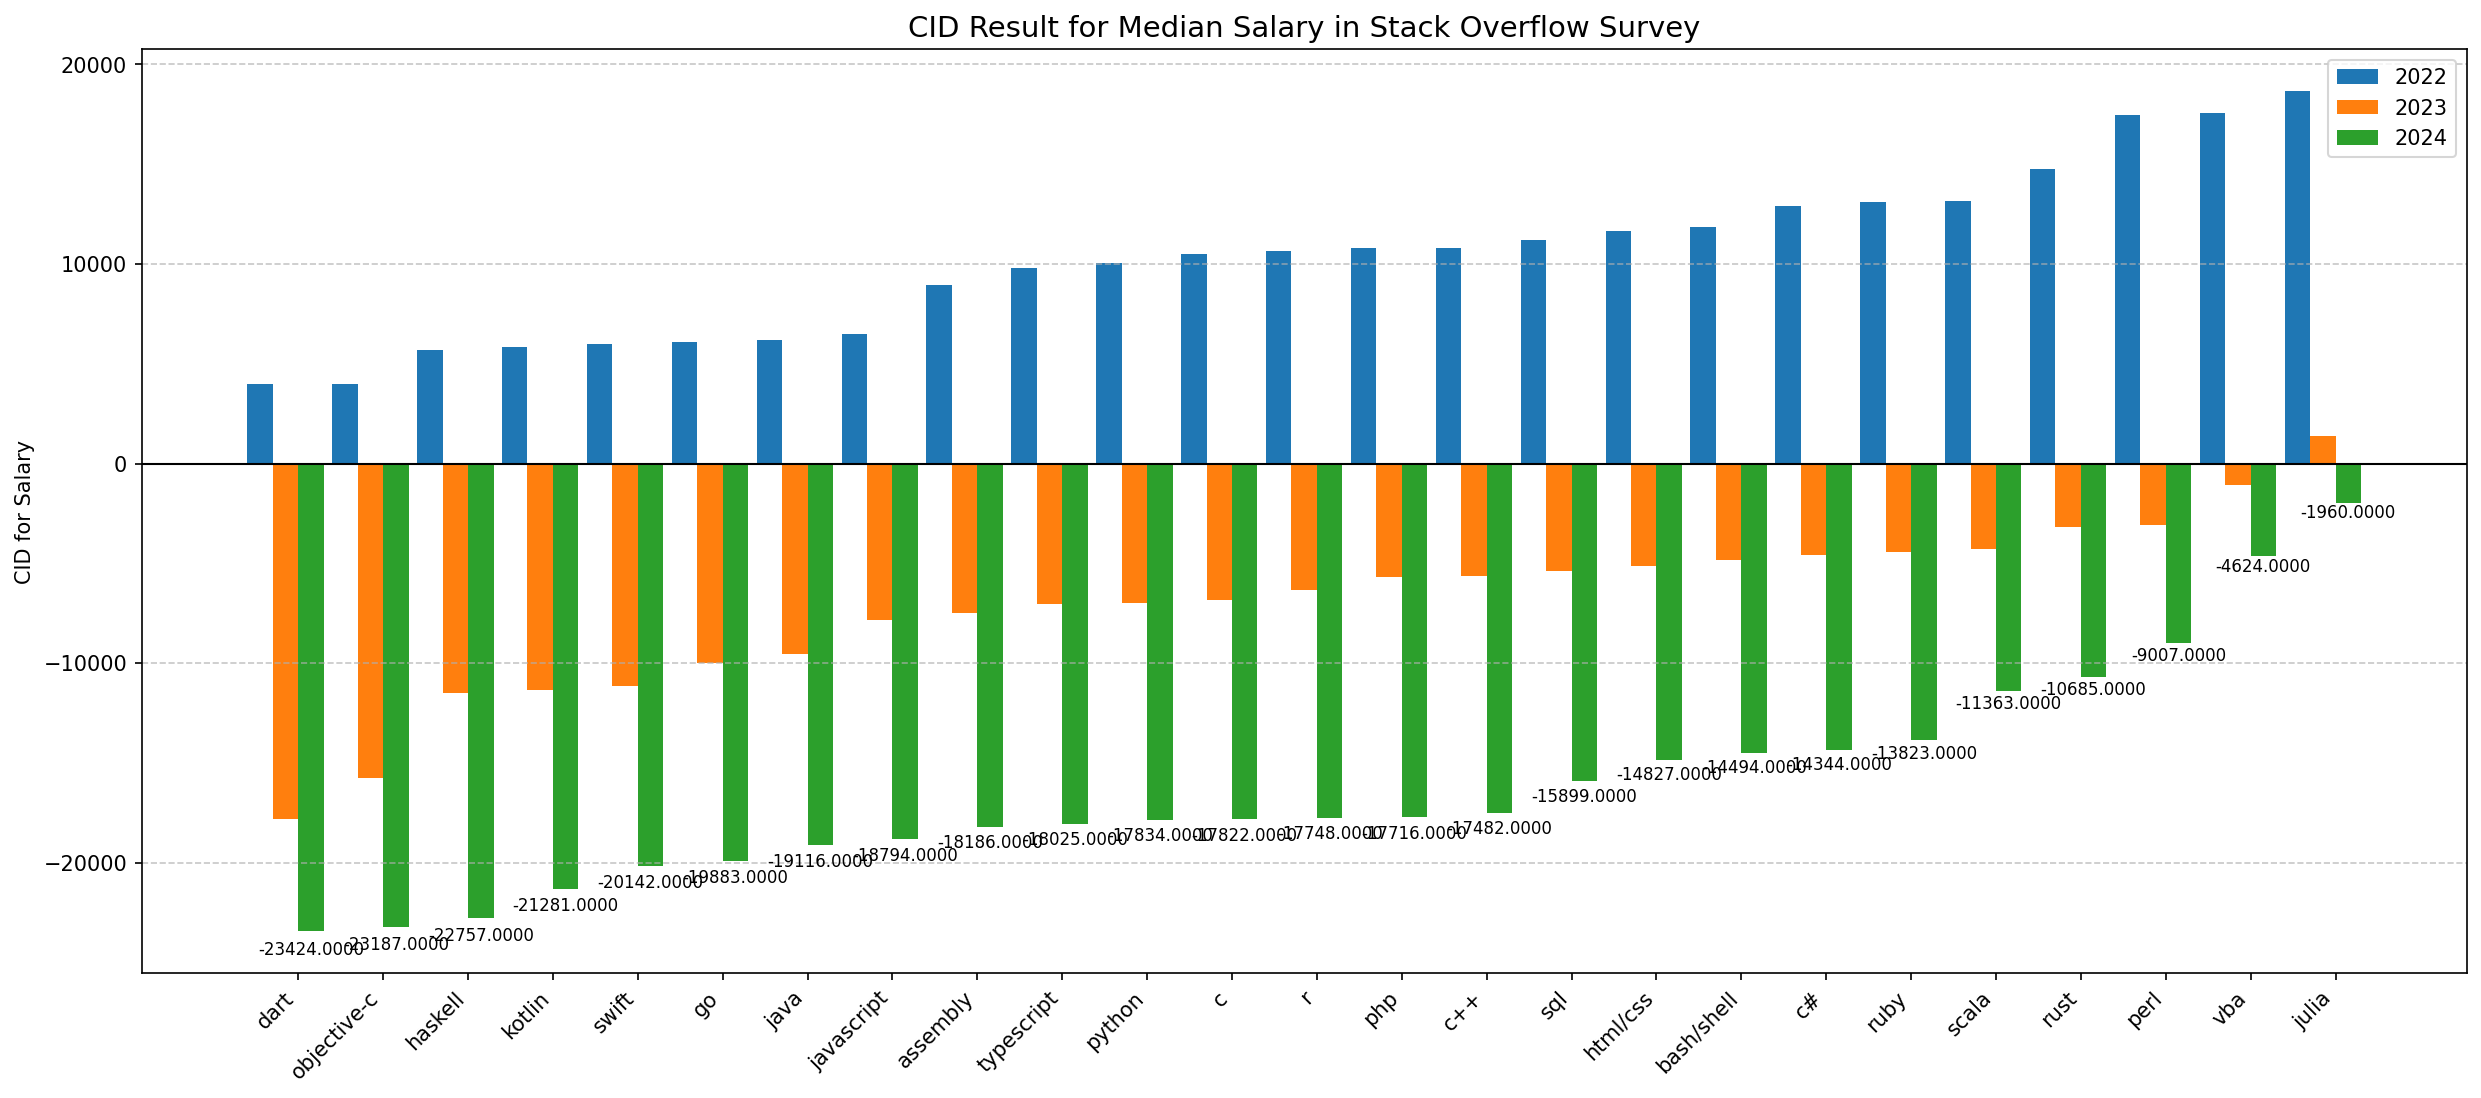

In [ ]:
draw_bar_garph_for_df(tot_df_nr)

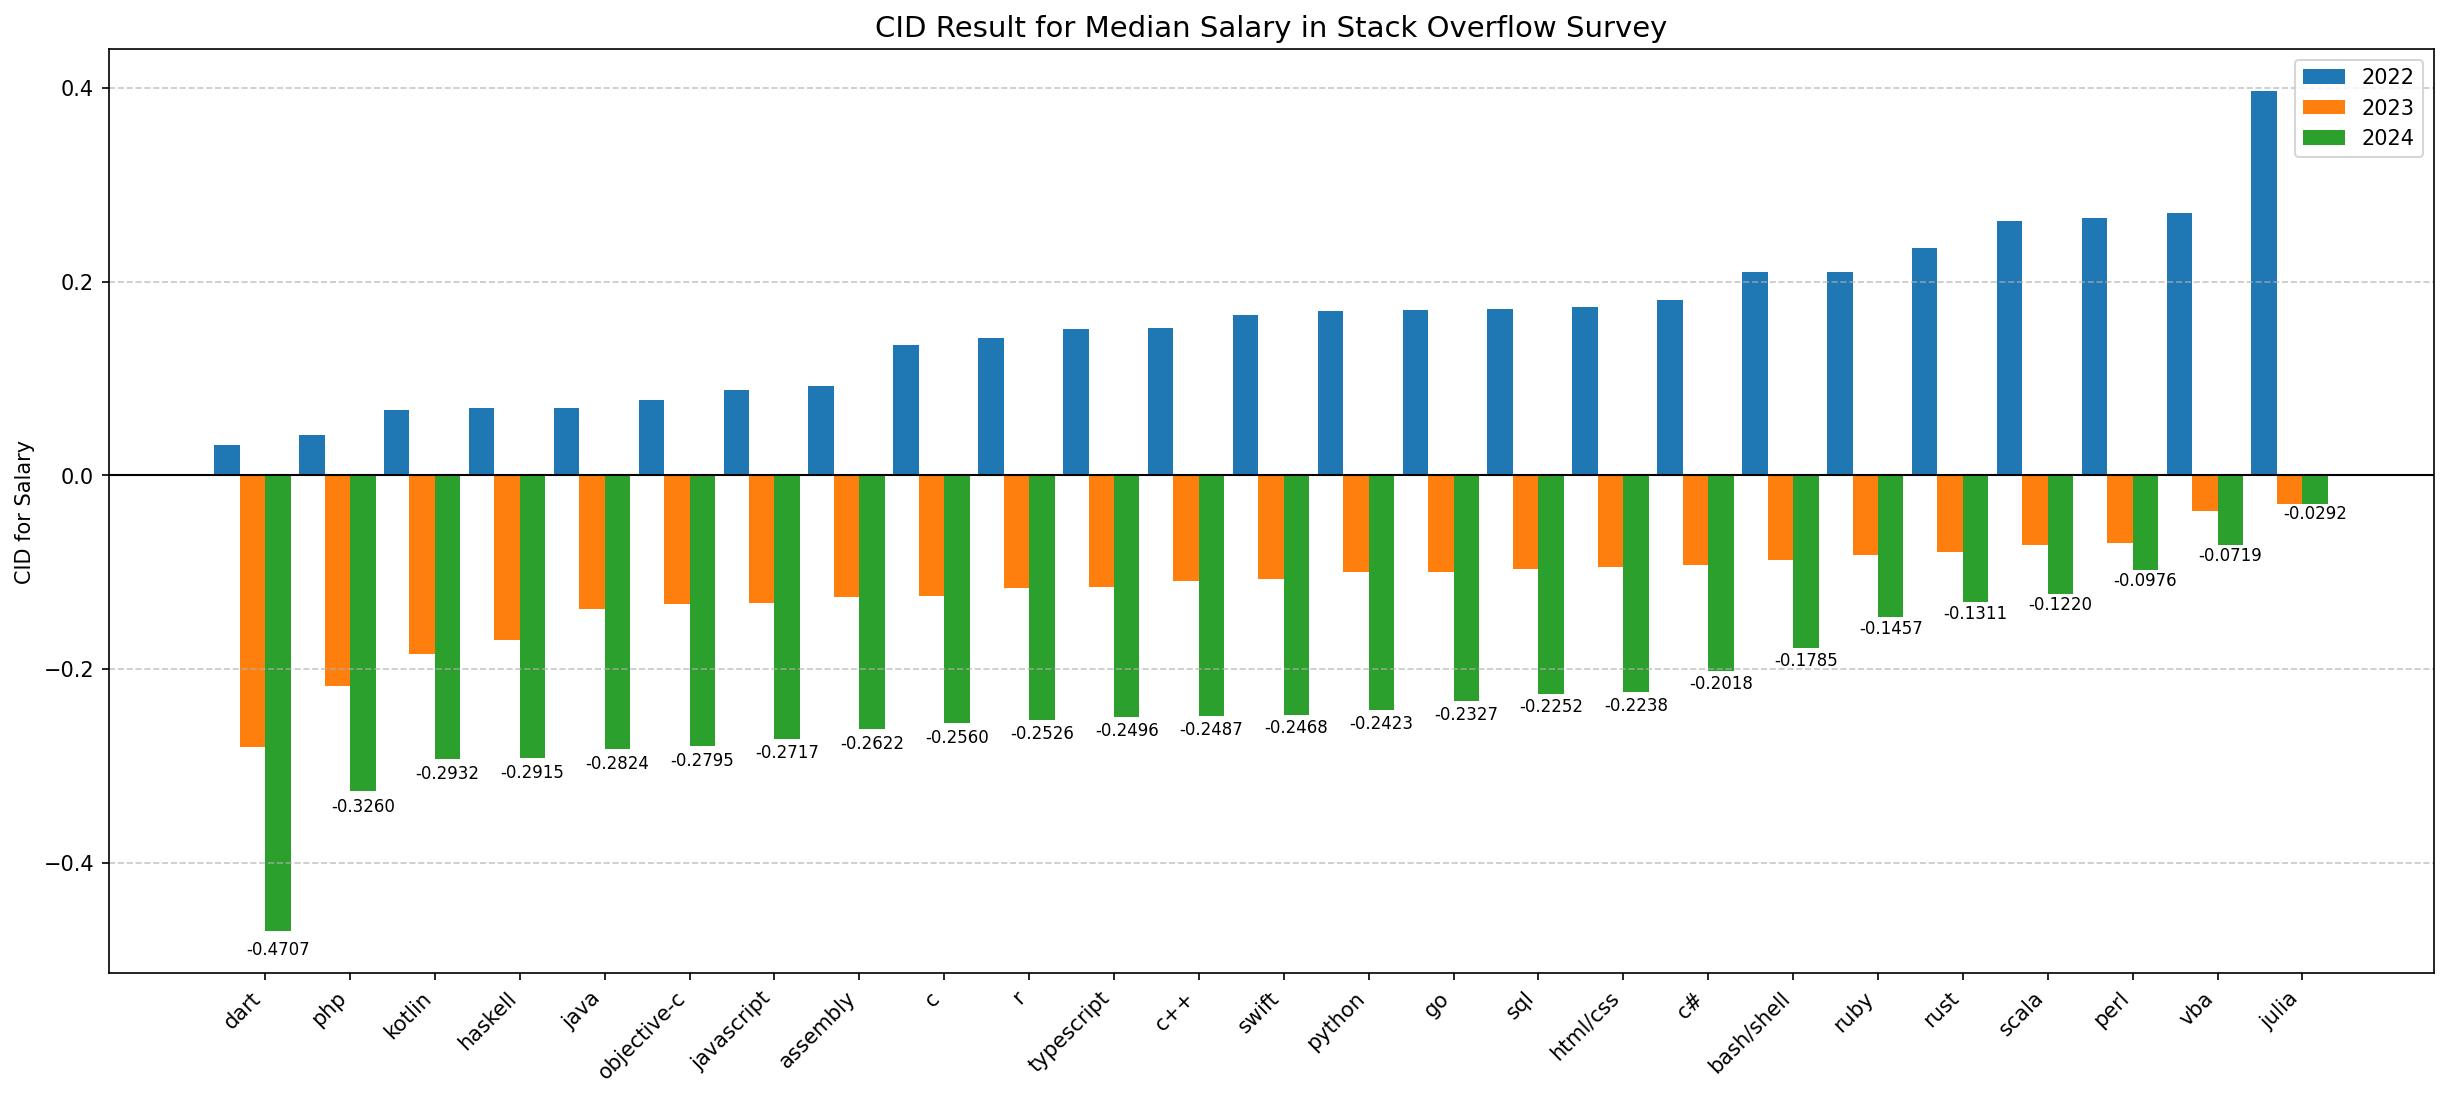

In [39]:
draw_bar_garph_for_df(tot_df_log)